In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('homework.csv')

In [3]:
data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


crim
per capita crime rate by town.

zn
proportion of residential land zoned for lots over 25,000 sq.ft.

indus
proportion of non-retail business acres per town.

chas
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox
nitrogen oxides concentration (parts per 10 million).

rm
average number of rooms per dwelling.

age
proportion of owner-occupied units built prior to 1940.

dis
weighted mean of distances to five Boston employment centres.

rad
index of accessibility to radial highways.

tax
full-value property-tax rate per $10,000.

ptratio
pupil-teacher ratio by town.

black
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat
lower status of the population (percent).

medv
median value of owner-occupied homes in $1000s.

In [4]:
data.info() #наш датасет без пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [5]:
data.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [11]:
data_arg = data.drop('medv', 1)

In [41]:
# строим модель SVR
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [57]:
X = data_arg
y = data['medv']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=100)

In [59]:
# Приводим данные к одному масштабу
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [90]:
X_test.shape

(67, 2)

In [88]:
y_test.shape

(67,)

In [61]:
estimator = SVR()
estimator.fit(X_train, y_train) 

y_pred = estimator.predict(X_test)

In [62]:
y_pred

array([28.88327175, 29.88867514, 22.30148355, 19.34972116, 11.01399774,
       25.78551578, 24.03618808, 22.36016876, 28.30932481, 25.82273578,
       29.38536239, 22.38234513, 19.52573528, 16.47976519, 16.26050229,
       26.05762294, 13.06705736, 17.52038712, 19.41427309, 17.49945626,
       22.95590897, 18.84423397, 31.15156768, 21.28597729, 19.60306763,
       26.07356996, 12.5411368 , 13.99414474, 24.68653398, 21.11684093,
       15.34506495, 18.26354412, 12.11082969, 27.24337234, 28.45119574,
       13.20074784, 24.98948988, 24.52226445, 21.73984385, 19.59850715,
       29.24145085, 21.53816497, 27.18991828, 30.62386459, 25.42057516,
       18.55963842, 27.86563602, 19.02906229, 12.8385944 , 23.35922438,
       22.71636619, 15.5612956 , 20.49663026, 21.81962984, 14.01722844,
       18.57779187, 32.785743  , 23.42227056, 16.7878484 , 24.56501102,
       19.35472344, 15.89133102, 24.070958  , 23.51293227, 28.52427229,
       28.85502796, 23.19206232])

In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.569504499546373
3.850995911566437


Коэффициент детерминации равен 0.56. Попробуем улучшить модель взяв опеределенные параметры

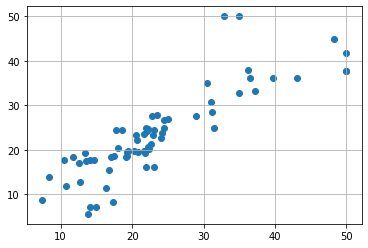

In [97]:
from matplotlib import pyplot as plt
plt.scatter(y_test,y_pred)
plt.show
plt.grid()
#plt.plot(y_test, y_pred, color='blue', linewidth=3)

In [ ]:
#для построения следующей модели рассмотрим только те переметры, которые в наибольшей степени коррелируют и переменной medv

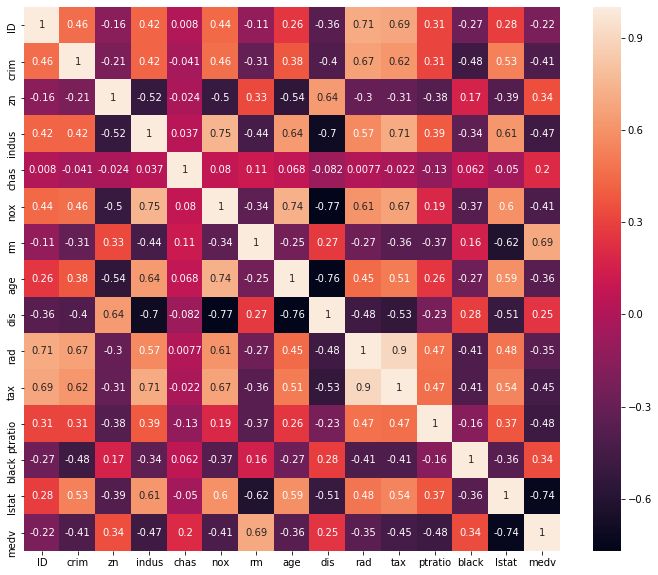

In [70]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,10)) 
hm = sns.heatmap(data.corr(),annot=True)

In [71]:
#для построения модели возьмем переменные lstat и rm

In [73]:
# строим модель DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

In [74]:
X = data[['lstat','rm']]
y = data['medv']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=100)

In [76]:
# Приводим данные к одному масштабу
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [77]:
estimator = DecisionTreeRegressor()
estimator.fit(X_train, y_train) 

y_pred = estimator.predict(X_test)

In [78]:
y_pred

array([36.1, 36.1, 20.2, 18.7, 11.8, 27.5, 37.6, 23.4, 28.5, 26.6, 33.1,
       23.6, 18.7, 16.1, 17.1, 25. , 18.4,  8.3, 19.8, 15.4, 20.6, 18.4,
       32.7, 19.8,  7.2, 27.9, 17.8,  7.2, 41.7, 19.4, 12.8,  5.6,  8.8,
       50. , 30.7, 13.9, 27. , 27.5, 21.4, 19.8, 37.6, 19.2, 37.9, 36.1,
       25. , 19.4, 24.8, 20.4, 11.5, 24.4, 22.6, 17.8, 19.3, 18.4, 17.4,
       24.4, 44.8, 24.6, 16.1, 23.8, 24.4, 17.8, 24.3, 23.4, 35.1, 50. ,
       22.3])

In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.7242904462597275
3.8820895522388064


Коэффициент детерминации увеличился,значит эта модель лучше обучилась.

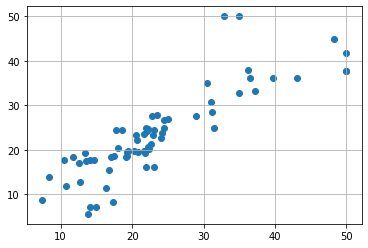

In [83]:
from matplotlib import pyplot as plt
plt.scatter(y_test,y_pred)
plt.show
plt.grid()